#Data loading and preparation

##Loading data for analysis

In [44]:
import pandas as pd

df = pd.read_html('http://lotostat.ru/eurojackpot/arhiv-eurojackpot/')
df = df[1]
df

,0,1,2,3,4,5,6,7,8
0,№ Тиража,Число 1,Число 2,Число 3,Число 4,Число 5,Доп 1,Доп 2,Дата
1,1,5,8,21,37,46,6,8,23.03.2012
2,2,5,7,12,19,26,1,5,30.03.2012
3,3,7,8,34,36,38,4,5,06.04.2012
4,4,5,11,12,27,32,1,3,13.04.2012
...,...,...,...,...,...,...,...,...,...
443,443,2,5,24,43,45,4,10,11.09.2020
444,444,7,12,14,40,42,7,8,18.09.2020
445,445,1,7,9,29,46,9,10,25.09.2020
446,446,15,19,34,39,49,2,7,02.10.2020


In [45]:
df = df.rename(columns={0: 'No сirculation', 1: 'Digi_1', 2: 'Digi_2', 3: 'Digi_3', 4: 'Digi_4', 5: 'Digi_5', 6: 'Add_1', 7: 'Add_2', 8: 'Date'})
df = df.iloc [1:,:]
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
df

,No сirculation,Digi_1,Digi_2,Digi_3,Digi_4,Digi_5,Add_1,Add_2,Date
1,1,5,8,21,37,46,6,8,2012-03-23
2,2,5,7,12,19,26,1,5,2012-03-30
3,3,7,8,34,36,38,4,5,2012-04-06
4,4,5,11,12,27,32,1,3,2012-04-13
5,5,10,16,30,41,45,2,8,2012-04-20
...,...,...,...,...,...,...,...,...,...
443,443,2,5,24,43,45,4,10,2020-09-11
444,444,7,12,14,40,42,7,8,2020-09-18
445,445,1,7,9,29,46,9,10,2020-09-25
446,446,15,19,34,39,49,2,7,2020-10-02


##Parsing www.latloto.lv ...

In [46]:
def parse_url(page):
    data = pd.read_html('https://www.latloto.lv/lv/arhivs/eurojackpot/' + str(page))
    return data[0] if not data[0].empty else pd.DataFrame()

df1 = pd.DataFrame()
i = 1
while i <= 31:
    t = parse_url(i)
    if not t.empty:
        df1 = pd.concat([df1, t], ignore_index=True)
    i += 1
df1

,Unnamed: 0,Izlozes Nr.,Datums,Izlozētie skaitļi,Rezultāti
0,NaN,239,22.12.2023,4 6 12 31 38 + 2 12,Šeit
1,NaN,238,19.12.2023,4 6 17 31 45 + 6 12,Šeit
2,NaN,237,15.12.2023,7 15 17 18 39 + 1 10,Šeit
3,NaN,236,12.12.2023,2 8 20 34 40 + 9 12,Šeit
4,NaN,235,08.12.2023,2 8 28 32 37 + 3 6,Šeit
...,...,...,...,...,...
615,NaN,234957,06.12.2013,1 8 18 25 47 + 2 7,Šeit
616,NaN,234857,29.11.2013,17 25 32 35 45 + 4 7,Šeit
617,NaN,234757,22.11.2013,1 38 39 42 47 + 1 2,Šeit
618,NaN,234657,15.11.2013,3 19 32 43 48 + 4 8,Šeit


## Changing data

In [47]:
df1 = df1.drop(['Unnamed: 0', 'Rezultāti'], axis=1)
df1 = df1.rename(columns={'Datums': 'Date'})
df1['Date'] = pd.to_datetime(df1['Date'], format='%d.%m.%Y')

#copying only new data
df1 = df1[df1['Date'] > '2020-10-09'].copy()

#splitting the results field into separate values
df1[['Digi_1', 'gab0', 'Digi_2', 'gab1', 'Digi_3', 'gab2', 'Digi_4', 'gab3', 'Digi_5', 'gab4', 'gab5', 'gab6', 'Add_1', 'gab7', 'Add_2']] = df1['Izlozētie skaitļi'].str.split(' ', expand=True)
df1 = df1.drop(['Izlozes Nr.', 'Izlozētie skaitļi', 'gab0', 'gab1', 'gab2', 'gab3', 'gab4', 'gab5', 'gab6','gab7'], axis=1)
df1 = df1.sort_values(by='Date', ascending=True)

#merging two dataframes into one, deleting redundant dataframes
df = pd.concat([df, df1], ignore_index=True)
del df1

#correction of dataframe indexes (numbers of lotteries)
df = df.reset_index(drop=True)
df['No сirculation'] = df.groupby(df.index).cumcount()
df['No сirculation'] = df.index + 1

df

,No сirculation,Digi_1,Digi_2,Digi_3,Digi_4,Digi_5,Add_1,Add_2,Date
0,1,5,8,21,37,46,6,8,2012-03-23
1,2,5,7,12,19,26,1,5,2012-03-30
2,3,7,8,34,36,38,4,5,2012-04-06
3,4,5,11,12,27,32,1,3,2012-04-13
4,5,10,16,30,41,45,2,8,2012-04-20
...,...,...,...,...,...,...,...,...,...
700,701,2,8,28,32,37,3,6,2023-12-08
701,702,2,8,20,34,40,9,12,2023-12-12
702,703,7,15,17,18,39,1,10,2023-12-15
703,704,4,6,17,31,45,6,12,2023-12-19


#Frequency and probability

##Get the frequency of choice of numbers

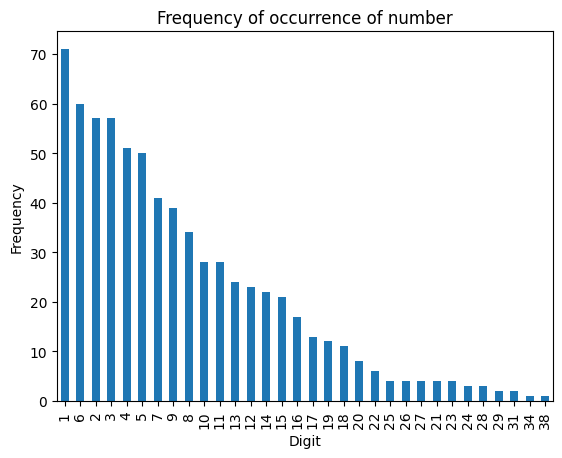

In [68]:
import matplotlib.pyplot as plt

frequency = df['Digi_1'].value_counts()
frequency.plot(kind='bar', xlabel='Digit', ylabel='Frequency', title='Frequency of occurrence of number')
plt.show()

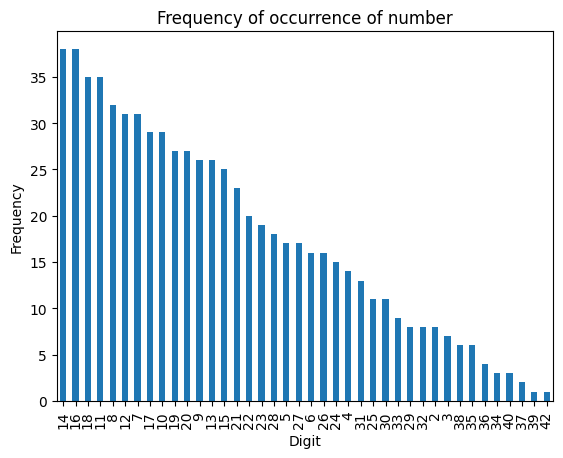

In [69]:
frequency = df['Digi_2'].value_counts()
frequency.plot(kind='bar', xlabel='Digit', ylabel='Frequency', title='Frequency of occurrence of number')
plt.show()

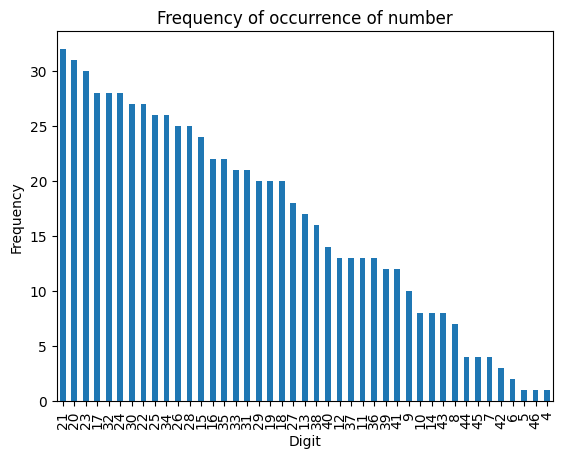

In [70]:
frequency = df['Digi_3'].value_counts()
frequency.plot(kind='bar', xlabel='Digit', ylabel='Frequency', title='Frequency of occurrence of number')
plt.show()

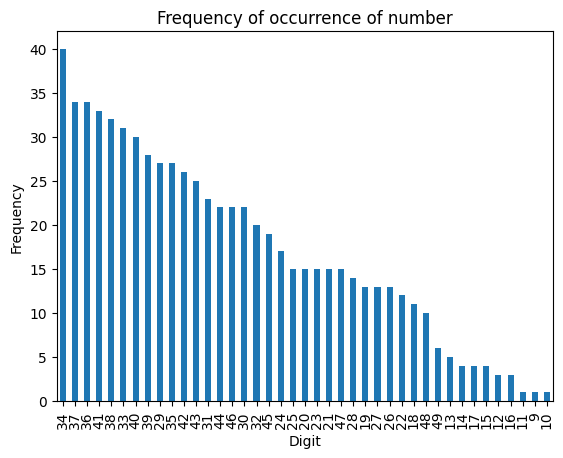

In [71]:
frequency = df['Digi_4'].value_counts()
frequency.plot(kind='bar', xlabel='Digit', ylabel='Frequency', title='Frequency of occurrence of number')
plt.show()

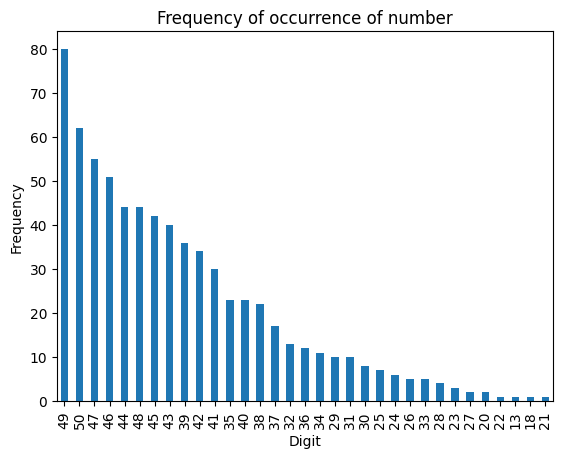

In [72]:
frequency = df['Digi_5'].value_counts()
frequency.plot(kind='bar', xlabel='Digit', ylabel='Frequency', title='Frequency of occurrence of number')
plt.show()

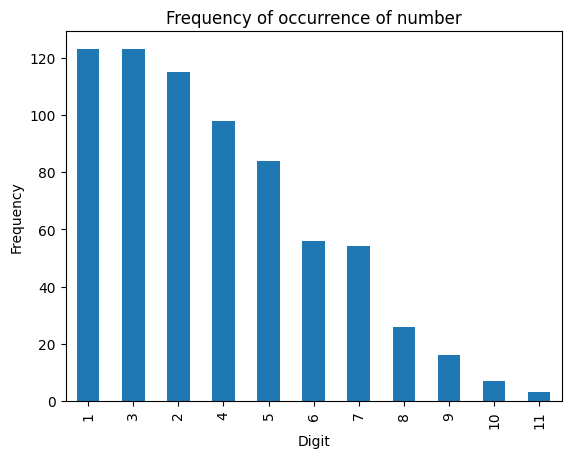

In [73]:
frequency = df['Add_1'].value_counts()
frequency.plot(kind='bar', xlabel='Digit', ylabel='Frequency', title='Frequency of occurrence of number')
plt.show()

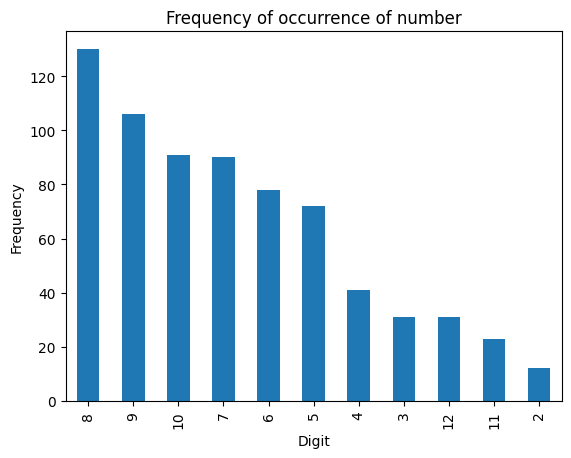

In [74]:
frequency = df['Add_2'].value_counts()
frequency.plot(kind='bar', xlabel='Digit', ylabel='Frequency', title='Frequency of occurrence of number')
plt.show()

##Calculation of the probability of numbers falling out (top 3 for each field)

In [104]:
# P(A) = m / n

num_lot = len(df.index)

# digit_1
print('digit_1')
a = 0
frequency = df['Digi_1'].value_counts().head(3)
for i in frequency.index:
  print('P(' + str(i) + ') = ' + str(frequency[a]) + '/' + str(num_lot) + ' = ' + str(frequency[a] / num_lot))
  a += 1
print('')

# digit_2
print('digit_2')
a = 0
frequency = df['Digi_2'].value_counts().head(3)
for i in frequency.index:
  print('P(' + str(i) + ') = ' + str(frequency[a]) + '/' + str(num_lot) + ' = ' + str(frequency[a] / num_lot))
  a += 1
print('')

# digit_3
print('digit_3')
a = 0
frequency = df['Digi_3'].value_counts().head(3)
for i in frequency.index:
  print('P(' + str(i) + ') = ' + str(frequency[a]) + '/' + str(num_lot) + ' = ' + str(frequency[a] / num_lot))
  a += 1
print('')

# digit_4
print('digit_4')
a = 0
frequency = df['Digi_4'].value_counts().head(3)
for i in frequency.index:
  print('P(' + str(i) + ') = ' + str(frequency[a]) + '/' + str(num_lot) + ' = ' + str(frequency[a] / num_lot))
  a += 1
print('')

# digit_3
print('digit_5')
a = 0
frequency = df['Digi_5'].value_counts().head(3)
for i in frequency.index:
  print('P(' + str(i) + ') = ' + str(frequency[a]) + '/' + str(num_lot) + ' = ' + str(frequency[a] / num_lot))
  a += 1
print('')

# add_1
print('add_1')
a = 0
frequency = df['Add_1'].value_counts().head(3)
for i in frequency.index:
  print('P(' + str(i) + ') = ' + str(frequency[a]) + '/' + str(num_lot) + ' = ' + str(frequency[a] / num_lot))
  a += 1
print('')

# add_2
print('add_2')
a = 0
frequency = df['Add_2'].value_counts().head(3)
for i in frequency.index:
  print('P(' + str(i) + ') = ' + str(frequency[a]) + '/' + str(num_lot) + ' = ' + str(frequency[a] / num_lot))
  a += 1

digit_1
P(1) = 71/705 = 0.10070921985815603
P(6) = 60/705 = 0.0851063829787234
P(2) = 57/705 = 0.08085106382978724

digit_2
P(14) = 38/705 = 0.05390070921985816
P(16) = 38/705 = 0.05390070921985816
P(18) = 35/705 = 0.04964539007092199

digit_3
P(21) = 32/705 = 0.04539007092198582
P(20) = 31/705 = 0.04397163120567376
P(23) = 30/705 = 0.0425531914893617

digit_4
P(34) = 40/705 = 0.05673758865248227
P(37) = 34/705 = 0.04822695035460993
P(36) = 34/705 = 0.04822695035460993

digit_5
P(49) = 80/705 = 0.11347517730496454
P(50) = 62/705 = 0.08794326241134752
P(47) = 55/705 = 0.07801418439716312

add_1
P(1) = 123/705 = 0.17446808510638298
P(3) = 123/705 = 0.17446808510638298
P(2) = 115/705 = 0.16312056737588654

add_2
P(8) = 130/705 = 0.18439716312056736
P(9) = 106/705 = 0.150354609929078
P(10) = 91/705 = 0.12907801418439716
